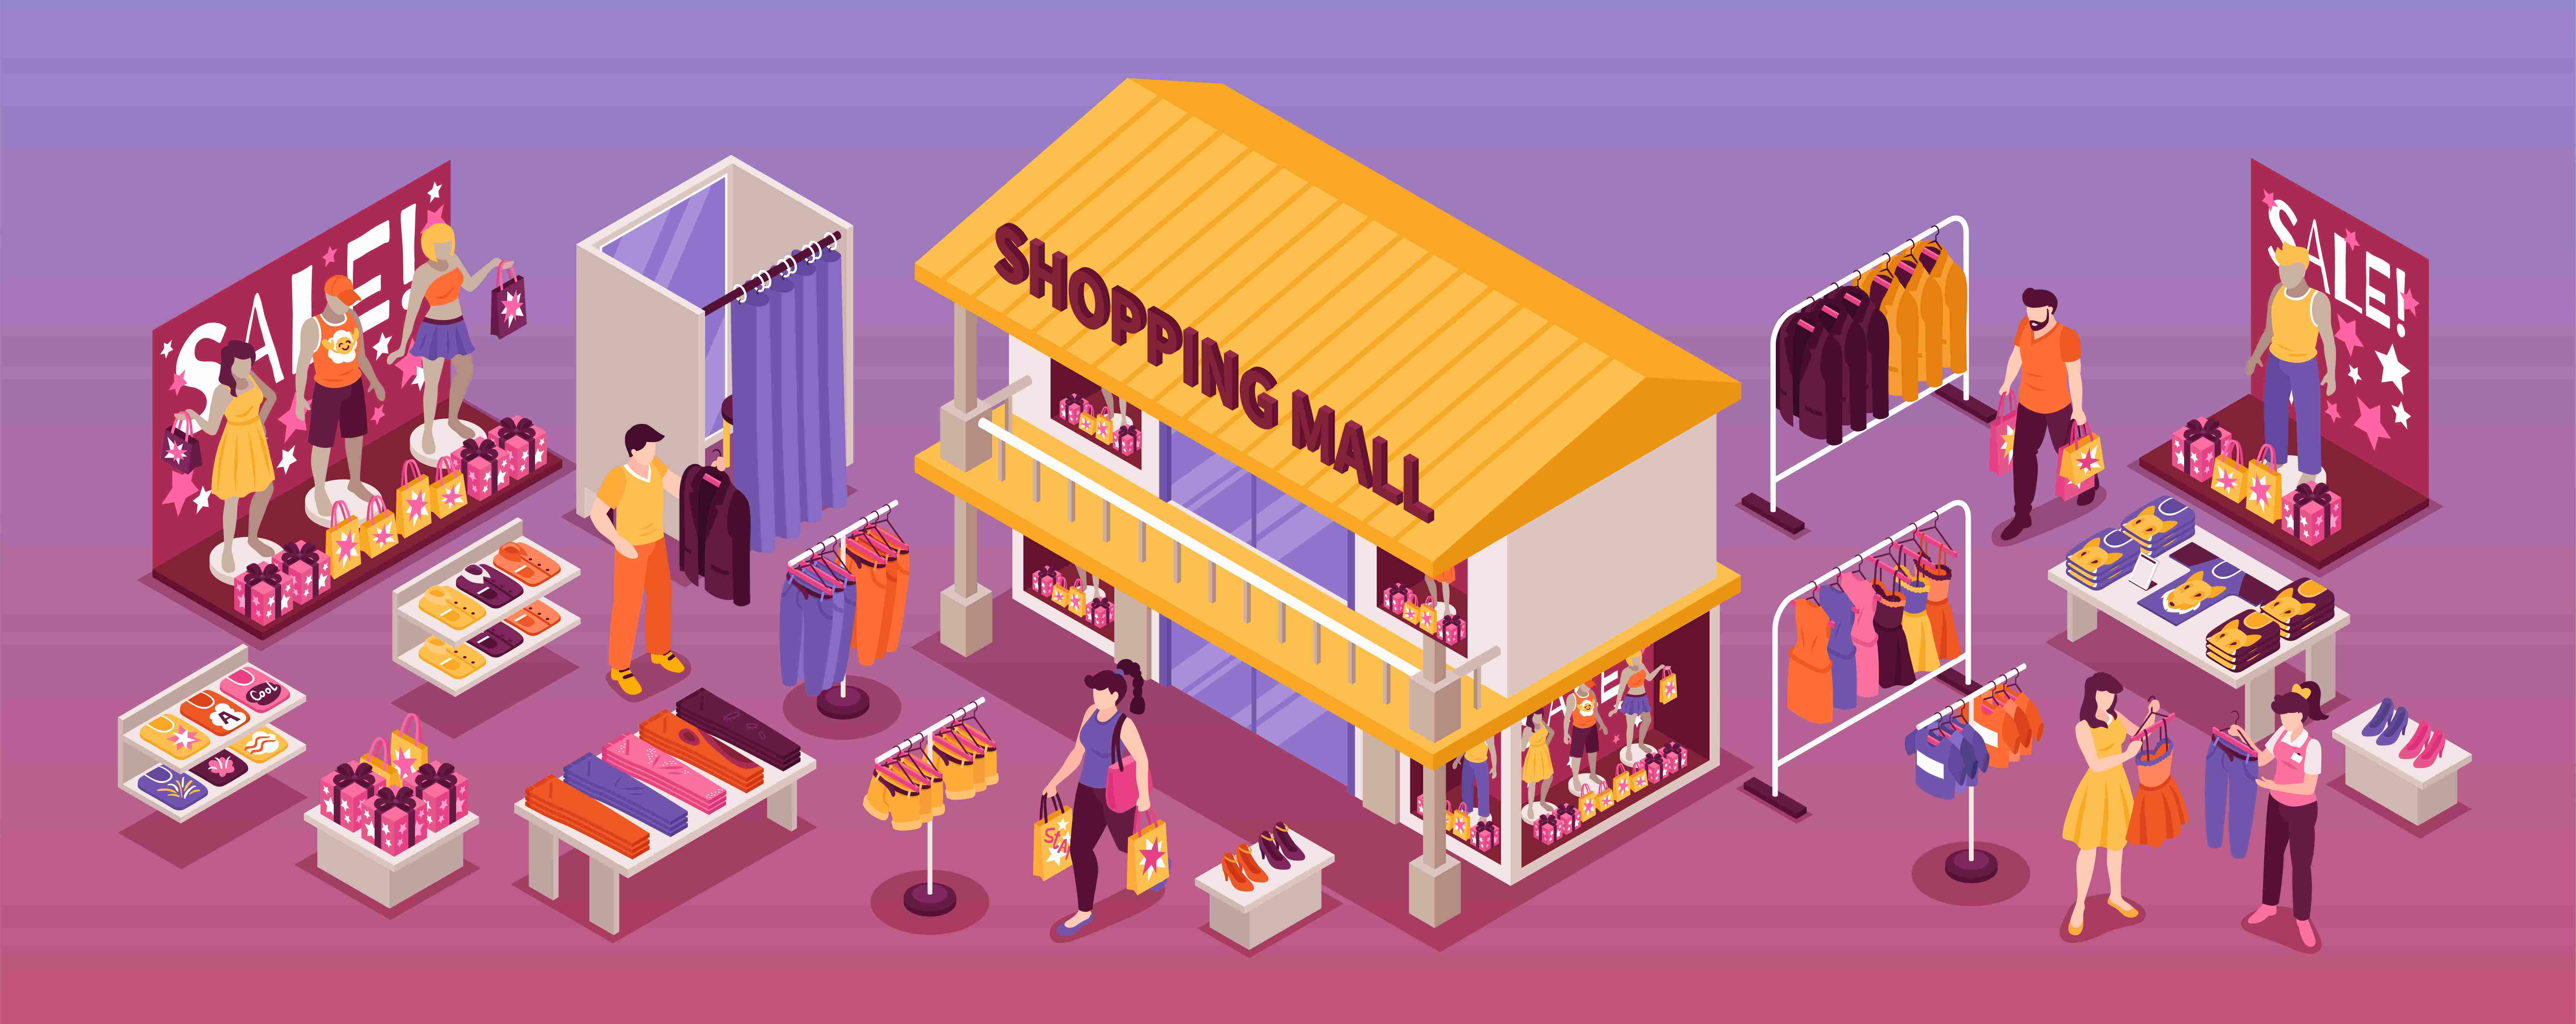


# Santander Customer Transaction Prediction

## Overview

This Notebook will be completed in two main ways.<br/>
First, find and visualize useful data or meaningful relationships within the data.<br/>
Second, select a model based on the visualization of the previous process. Transform or refine the data into the appropriate form for the model to be used.<br/><br/>

The number of columns in the competition data is 202. So we have to determine how to use and discard this heat, and predict the results through the model. In this notebook, I will deal with data in various ways based on my experience.
##### "Dealing with a lot of data is the core of this competition."<br/>


#### My opinion :
* 1) At first, I think dimensionality reduction is necessary due to the vast amount of data, but I think of other ways with poor results.<br/>
* 2) Moreover, it occurred to me that detecting outliers well and dealing with them is an important part.

***

## My workflow
#### 1. Import & Install libray
* Import Basic libray
* Import Enginnering libray

#### 2. Check out my data
* Check Shape / Info
* Set color palette

#### 3. Exploratory Data Analysis(EDA) with Visualization [Before Preprocessing]
* Plot the null values
* Plot the "target" columns count
* Plot the Distribution of triandata and testdata
* Customer Transaction train data Heatmap

#### 4. Prepocessing Data
* Drop useless columns

#### 5. Feature Enginnering 
* Check the need for PCA technology
* Split Train data / Test data

#### 6.Modeling
* LogisticRegression Modeling
* LGBMClassifier Modeling

#### 7. Submission
* LGBMClassifier predict
* LogisiticRegressor predict

# 1. Import & Install libray
* Import Basic libray
* Import Enginnering libray

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
import lightgbm as lgb
from lightgbm import plot_importance
import xgboost as xgb

In [ ]:
train_df = pd.read_csv('../input/santander-customer-transaction-prediction/train.csv')
test_df = pd.read_csv('../input/santander-customer-transaction-prediction/test.csv')
train_df.head()

# 2. Check out my data
* Check Shape / Info
* Set color palette

In [ ]:
train_df.info()

In [ ]:
train_df.describe()

In [ ]:
sns.color_palette("RdPu", as_cmap=True)

In [ ]:
flare_palette = sns.color_palette("flare", 10)
RdPu_palette = sns.color_palette("RdPu", 10)

sns.palplot(RdPu_palette)
sns.palplot(flare_palette)

#### ✔️ This notebook will use this palettes.

# 3. Exploratory Data Analysis(EDA) with Visualization [Before Preprocessing]
* Plot the null values
* Plot the "target" columns count
* Plot the Distribution of triandata and testdata
* Customer Transaction train data Heatmap

### 3-1) Plot the null values

In [ ]:
train_df_null_count = pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False), columns=["Train Null count"])
test_df_null_count = pd.DataFrame(test_df.isnull().sum().sort_values(ascending=False), columns=["Test Null count"])

null_df = pd.concat([train_df_null_count,test_df_null_count],axis=1)
null_df.head().style.background_gradient(cmap='RdPu')

In [ ]:
msno.matrix(df=train_df.iloc[:,:],figsize=(15,5),color=RdPu_palette[3])
plt.show()

#### => This confirms that there are no missing values.

### 3-3) Plot the Distribution of triandata and testdata

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,6))
sns.countplot('target', data=train_df, ax=ax[0], palette=[RdPu_palette[4], RdPu_palette[3]])
ax[0].patch.set_alpha(0)
ax[0].set_title('Count plot - target',fontweight="bold")
train_df['target'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True, colors=[RdPu_palette[2], RdPu_palette[0]])
ax[1].set_title('Pie plot - target',fontweight="bold")


fig.text(0.25,0.96,"Plot the target data percent", fontweight="bold", fontfamily='serif', fontsize=20)
plt.show()
#target == 0 : negative(fake)
#tarege == 1 : postive(real)

#### => We can see that the value of target data is disproportionate.

In [ ]:
features = train_df.drop(['ID_code','target'],axis=1)

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(15,8), constrained_layout=True)

#axes[0]
sns.distplot(train_df[features.columns].mean(axis=1),color=flare_palette[0], kde=True,bins=120, ax=axes[0], label='train')
sns.distplot(test_df[features.columns].mean(axis=1),color=flare_palette[4], kde=True,bins=120, ax=axes[0], label='test')
axes[0].set_title("Distribution of mean values per row for the train set and the test set", fontweight="bold", fontfamily='serif', fontsize=15)
axes[0].patch.set_alpha(0) 
axes[0].legend()

#axes[1]
sns.distplot(train_df[features.columns].skew(axis=1),color=RdPu_palette[4], kde=True,bins=120, ax=axes[1], label='train')
sns.distplot(test_df[features.columns].skew(axis=1),color=RdPu_palette[9], kde=True,bins=120, ax=axes[1], label='test')
axes[1].set_title("Distribution of mean values per row for the train set and the test set", fontweight="bold", fontfamily='serif', fontsize=15)
axes[1].patch.set_alpha(0)
axes[1].legend()

fig.text(0.32,1.05,"Distribution of triansets and testsets", fontweight="bold", fontfamily='serif', fontsize=20)
plt.show()

#### => Graph does not need to be normalized to bell shape

### 3-4) Customer Transaction train data Heatmap

In [ ]:
corr = train_df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap='RdPu')
plt.title("Customer Transaction train data Heatmap", fontweight="bold", fontsize=17)
plt.show()

# 4. Prepocessing Data
* Drop useless columns

In [ ]:
train_df.drop('ID_code', axis=1, inplace=True)
test_df.drop('ID_code', axis=1, inplace=True)

In [ ]:
train_df.head()

# 5. Feature Enginnering 
* Check the need for PCA technology
* Split Train data / Test data

### 5-1) Check the need for PCA technology

In [ ]:
x = train_df.drop(['target'], axis=1)
y = train_df['target']

In [ ]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler_df = pd.DataFrame(x_scaler, columns=x.columns)

pca = PCA(n_components=2)
x_scaler_pca = pca.fit_transform(x_scaler)
x_scaler_pca_df = pd.DataFrame(x_scaler_pca)

* To go through the process of PCA, you have to go through the process of StandardSclaer.

In [ ]:
x_scaler_pca_df.head().style.background_gradient(cmap='RdPu')

In [ ]:
print("Results of variance in 2 columns used : {}".format(pca.explained_variance_ratio_))

In [ ]:
print("Results of variance : {}".format(sum(pca.explained_variance_ratio_)))

* Two columns of dimension reduction represent only 0.01059.

In [ ]:
x_scaler_pca_df['target'] = y

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.scatter(x_scaler_pca_df.loc[:, 1], x_scaler_pca_df.loc[:, 0], c=y,  cmap="RdPu")
plt.axis('off')
fig.patch.set_facecolor(RdPu_palette[3])
plt.title("Results of dimensionality reduction with 2 columns", fontweight="bold")
plt.colorbar()
plt.show()

* => So we cant use PCA

### 5-2) Split Train data / Test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print("Train Dataset shape {} / {}".format(x_train.shape, y_train.shape))
print("Test Dataset shape {} / {}".format(x_test.shape, y_test.shape))

# 6.Modeling
* LogisticRegression Modeling
* LGBMClassifier Modeling

In [ ]:
# Set the function to output evaluation indicators
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('Confusion_matrix:\n', confusion)
    print('Accuracy: {:.4f}'.format(accuracy))
    print('Precision: {:.4f}'.format(precision))
    print('Recall: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

### 6-1) LogisticRegression Modeling

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
pred = log_reg.predict(x_test)

In [ ]:
get_clf_eval(y_test, pred)

### 6-2) LGBMClassifier Modeling

In [ ]:
lgbm_x_test, lgbm_x_val, lgbm_y_test, lgbm_y_val = train_test_split(x_test, y_test, test_size=0.5)

In [ ]:
train_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(lgbm_x_val, label=lgbm_y_val)
params = {
    'device' : 'gpu',
    'n_estimators': 7000,
    'num_leaves': 20,
    'max_depth': -1,
    'min_data_in_leaf': 80,
    'learning_rate': 0.008,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'n_jobs': -1
}

In [ ]:
lgbm_model = lgb.train(params,
                  train_data,
                  valid_sets=val_data, 
                  valid_names=['train','valid'],
                  early_stopping_rounds=100)

In [ ]:
pred = lgbm_model.predict(lgbm_x_test)
pred = (pred >= 0.5).astype(int)

In [ ]:
get_clf_eval(lgbm_y_test, pred)

In [ ]:
RdPu_palette_20 = sns.color_palette("RdPu", 20)
sns.palplot(RdPu_palette_20)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(lgbm_model, max_num_features=20,color=RdPu_palette_20, ax=ax)
ax.set_title("Distribution of Column Specific Importance ", fontweight="bold", fontsize=15)
ax.patch.set_alpha(0) 
plt.show()

# 7. Submission
* LGBMClassifier predict
* LogisiticRegressor predict

In [ ]:
lgbm_submission  = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv')
logistic_submission = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv')

lgbm_submission.head()

### 7-1) LGBMClassifier predict

In [ ]:
lgbm_target = lgbm_model.predict(test_df)
lgbm_submission['target'] = lgbm_target
lgbm_submission.head()

In [ ]:
lgbm_submission.to_csv('lgbm_submission1.csv', index=False)

### 7-2) LogisiticRegressor predict

In [ ]:
logistic_target = log_reg.predict(test_df)
logistic_submission['target'] = logistic_target
logistic_submission.head()

In [ ]:
logistic_submission.to_csv('logistic_submission.csv', index=False)

##### reference 
* https://www.kaggle.com/gpreda/santander-eda-and-prediction
* https://www.kaggle.com/roydatascience/eda-pca-simple-lgbm-on-kfold-technique

###  If this notebook is useful for your kaggling, "UPVOTE" for it 👀
#### THX to Reading My Notebook🌈